In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.sarimax_model import SARIMAXModel

# 1. Read data

In [3]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


# 2. AR model per country

In [4]:
model = SARIMAXModel()
model

In [5]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [6]:
from warnings import filterwarnings

filterwarnings('ignore')
model.fit(df_inflation)

In [7]:
for country, order in model.orders.items():
    print(f"Order for {country}: {order}")

Order for Spain: (2, 2)
Order for Guatemala: (1, 1)
Order for Australia: (1, 1)
Order for Dominican Republic: (1, 3)
Order for New Zealand: (1, 3)
Order for Italy: (1, 1)
Order for Sweden: (2, 3)
Order for Colombia: (3, 3)
Order for Paraguay: (1, 1)
Order for Peru: (1, 1)
Order for Belgium: (1, 1)
Order for Denmark: (3, 2)
Order for United States: (1, 3)
Order for Philippines: (3, 2)
Order for Indonesia: (3, 1)
Order for Japan: (2, 3)
Order for Finland: (3, 2)
Order for Norway: (3, 2)
Order for Greece: (2, 3)
Order for Austria: (2, 2)
Order for South Africa: (3, 3)
Order for France: (3, 2)
Order for Mauritius: (2, 3)
Order for Luxembourg: (2, 3)
Order for Switzerland: (3, 3)
Order for Singapore: (2, 1)
Order for Malaysia: (2, 2)
Order for Fiji: (3, 3)
Order for Turkey: (2, 3)
Order for Netherlands: (3, 3)
Order for Korea, Rep.: (2, 3)
Order for Thailand: (3, 2)
Order for Canada: (3, 3)
Order for Ireland: (3, 3)
Order for Germany: (3, 3)
Order for United Kingdom: (2, 3)
Order for Portug

In [8]:
model.models["Belgium"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 783.915
Date:                Tue, 12 Mar 2024   AIC                          -1561.831
Time:                        12:47:53   BIC                          -1551.761
Sample:                    06-30-1970   HQIC                         -1557.761
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9734      0.019     51.838      0.000       0.937       1.010
ma.L1         -0.5084      0.060     -8.527      0.000      -0.625      -0.392
sigma2      3.558e-05   2.32e-06     15.357      0.000     3.1e-05    4.01e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                69.40
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.24
Prob(H) (two-sided):                  0.37   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Evaluation

In [9]:
df_inflation["Country"].unique()

array(['Spain', 'Guatemala', 'Australia', 'Dominican Republic',
       'New Zealand', 'Italy', 'Sweden', 'Colombia', 'Paraguay', 'Peru',
       'Belgium', 'Denmark', 'United States', 'Philippines', 'Indonesia',
       'Japan', 'Finland', 'Norway', 'Greece', 'Austria', 'South Africa',
       'France', 'Mauritius', 'Luxembourg', 'Switzerland', 'Singapore',
       'Malaysia', 'Fiji', 'Turkey', 'Netherlands', 'Korea, Rep.',
       'Thailand', 'Canada', 'Ireland', 'Germany', 'United Kingdom',
       'Portugal', 'Cyprus', 'Iceland', 'Argentina'], dtype=object)

In [10]:
model.predict(df_inflation)

,yearmonth,Country,inflation
0,2023-04-01,Spain,0.014738
1,2023-04-01,Guatemala,0.012757
2,2023-04-01,Australia,0.014847
3,2023-04-01,Dominican Republic,0.014805
4,2023-04-01,New Zealand,0.012543
5,2023-04-01,Italy,0.017014
6,2023-04-01,Sweden,0.017067
7,2023-04-01,Colombia,0.014110
8,2023-04-01,Paraguay,0.014418
9,2023-04-01,Peru,0.013606


# 4. H-period ahead forecasting

In [11]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
8537,ESP,184,Spain,1970-04-01,0.000000
11635,GTM,258,Guatemala,1970-04-01,0.012577
1231,AUS,193,Australia,1970-04-01,0.011236
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
21697,NZL,196,New Zealand,1970-04-01,0.015421
...,...,...,...,...,...
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
15095,JPN,158,Japan,2023-01-01,0.004500
14347,ITA,136,Italy,2023-01-01,0.003938
21470,NOR,142,Norway,2023-01-01,0.006886


In [15]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2020-01-01", h=3)
forecast

,yearmonth,Country,inflation
0,2020-07-01,Spain,0.014738
1,2020-07-01,Guatemala,0.012757
2,2020-07-01,Australia,0.014847
3,2020-07-01,Dominican Republic,0.014805
4,2020-07-01,New Zealand,0.012543
...,...,...,...
515,2023-07-01,United Kingdom,0.018673
516,2023-07-01,Portugal,0.017177
517,2023-07-01,Cyprus,0.012433
518,2023-07-01,Iceland,0.011499


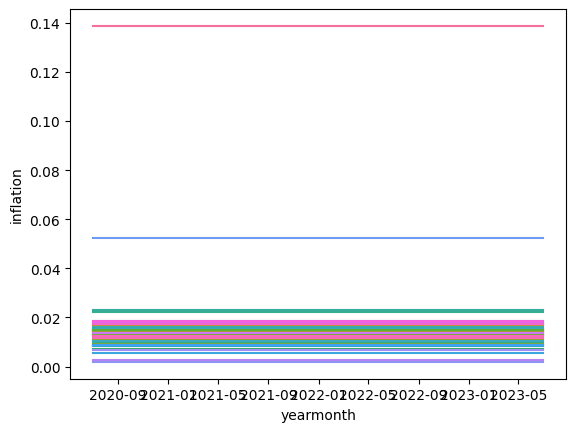

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()